Note that the variables in the houshold problem e, a, are in terms of non-tradable goods. We can convert them to tradable goods by multiplying them by the price of the non-tradable good. Consumption outputs c are in real terms.

In [2]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt   
import seaborn as sns


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']



plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

# # Apply style settings
# plt.rcParams.update({
#     'font.family': 'serif',
#     'font.serif': ['Palatino'],
#     'text.usetex': True
# })

# # Use seaborn style
# sns.set_style('white')


# from scipy.interpolate import CubicSpline
# from scipy.stats import norm

# import matplotlib.pyplot as plt   
# from matplotlib.ticker import FormatStrFormatter

# from seaborn import set_palette
# from matplotlib import rc
# plt.style.use('seaborn-v0_8-white')
# set_palette("colorblind")
# rc('font',**{'family':'serif','serif': ['Palatino']})
# rc('text',usetex=True)

from IHANKModel import IHANKModelClass
import figures as figs
import calculations

run_test = False
save_figs = False
path = '/Users/emmagundersen/Desktop/Current code/I_HANK_PIGL1703/fig/1903/'
lvl_path = ['U_hh', 'Walras', 'CB', 'i', 'NX', 'CA', 'ra', 'iF_s',  'iF_s']
path_philips= ['WTH', 'WNT', 'NTH', 'NNT', 'PTH', 'PNT', 'PF', 'UC_TH_hh', 'UC_NT_hh', 'EX']
paths = ['PE_s', 'PE', 'YH',  'W', 'P', 'w', 'tau',  'N', 'INC', 'inc',  'CT', 'CNT', 'p', 'E', 'PF_s', 'PF', 'CTH_s', 'i', 'ra', 'iF_s']
target_var = ['PE_s', 'PE', 'p', 'inc_NT', 'inc_TH', 'ra', 'i', 'Q']



In [ ]:

# # Basline preferences
# model = IHANKModelClass(name='baseline')

# model.par.eta_s = 0.51
# model.par.etaF = 0.51
# model.par.etaE = 0.1
# model.par.float = True
# model.par.pf_fixed = False
# model.par.mon_policy = 'real'
# model.par.phi_inflation = 1.5

# model.find_ss(do_print=False)
# model.compute_jacs()

# shock_PE_s, shock_forigne_interest, shock_PF_s, shock_PF_s_taylor, shock_PE_PF, shock_PE_PF_taylor, shock_i = calculations.difine_shocks(model, scale=1.0, rho = 0.8) 

In [3]:
model = IHANKModelClass(name='baseline')

model.par.eta_s = 0.5
model.par.etaF = 0.5
model.par.etaE = 0.1
# model.par.gamma_ = 
# model.par.tau_ss = 0.1
# model.par.gamma_ = model.par.epsilon_
# model.par.epsilon_ = 0.0 # for homothetic preferences
model.par.float = True
model.par.pf_fixed = False
model.par.mon_policy = 'real'
model.par.phi_inflation = 1.5

model.find_ss(do_print=False)
# model.compute_jacs()

shock_PE_s, shock_forigne_interest, shock_PF_s, shock_PF_s_taylor, shock_PE_PF, shock_PE_PF_taylor, shock_i = calculations.difine_shocks(model, scale=1.0, rho = 0.8) 

Share of domestic workers in tradable sector = 0.50
Average share of consumption of tradablespar.omega_T_ = 0.715
Average elasticity of substitution between tradable and non-tradable goodspar.eta_T_RA = 0.428


In [4]:
model.compute_jacs()


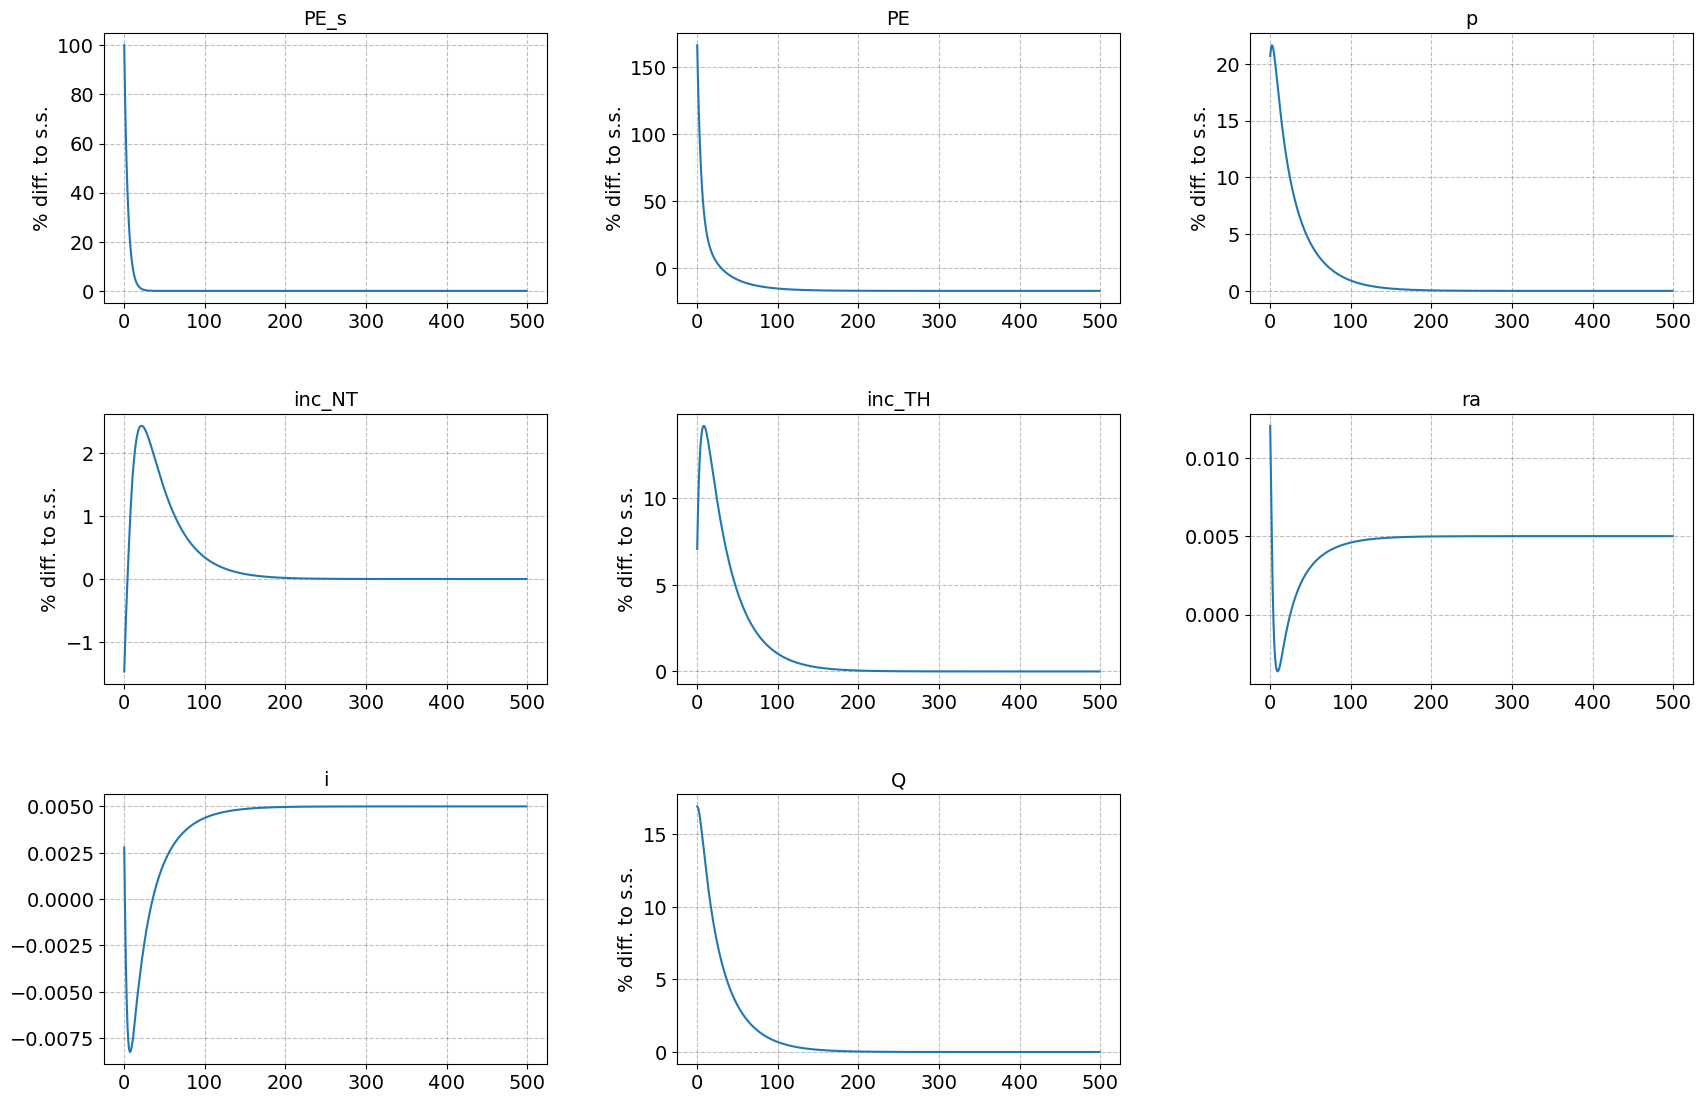

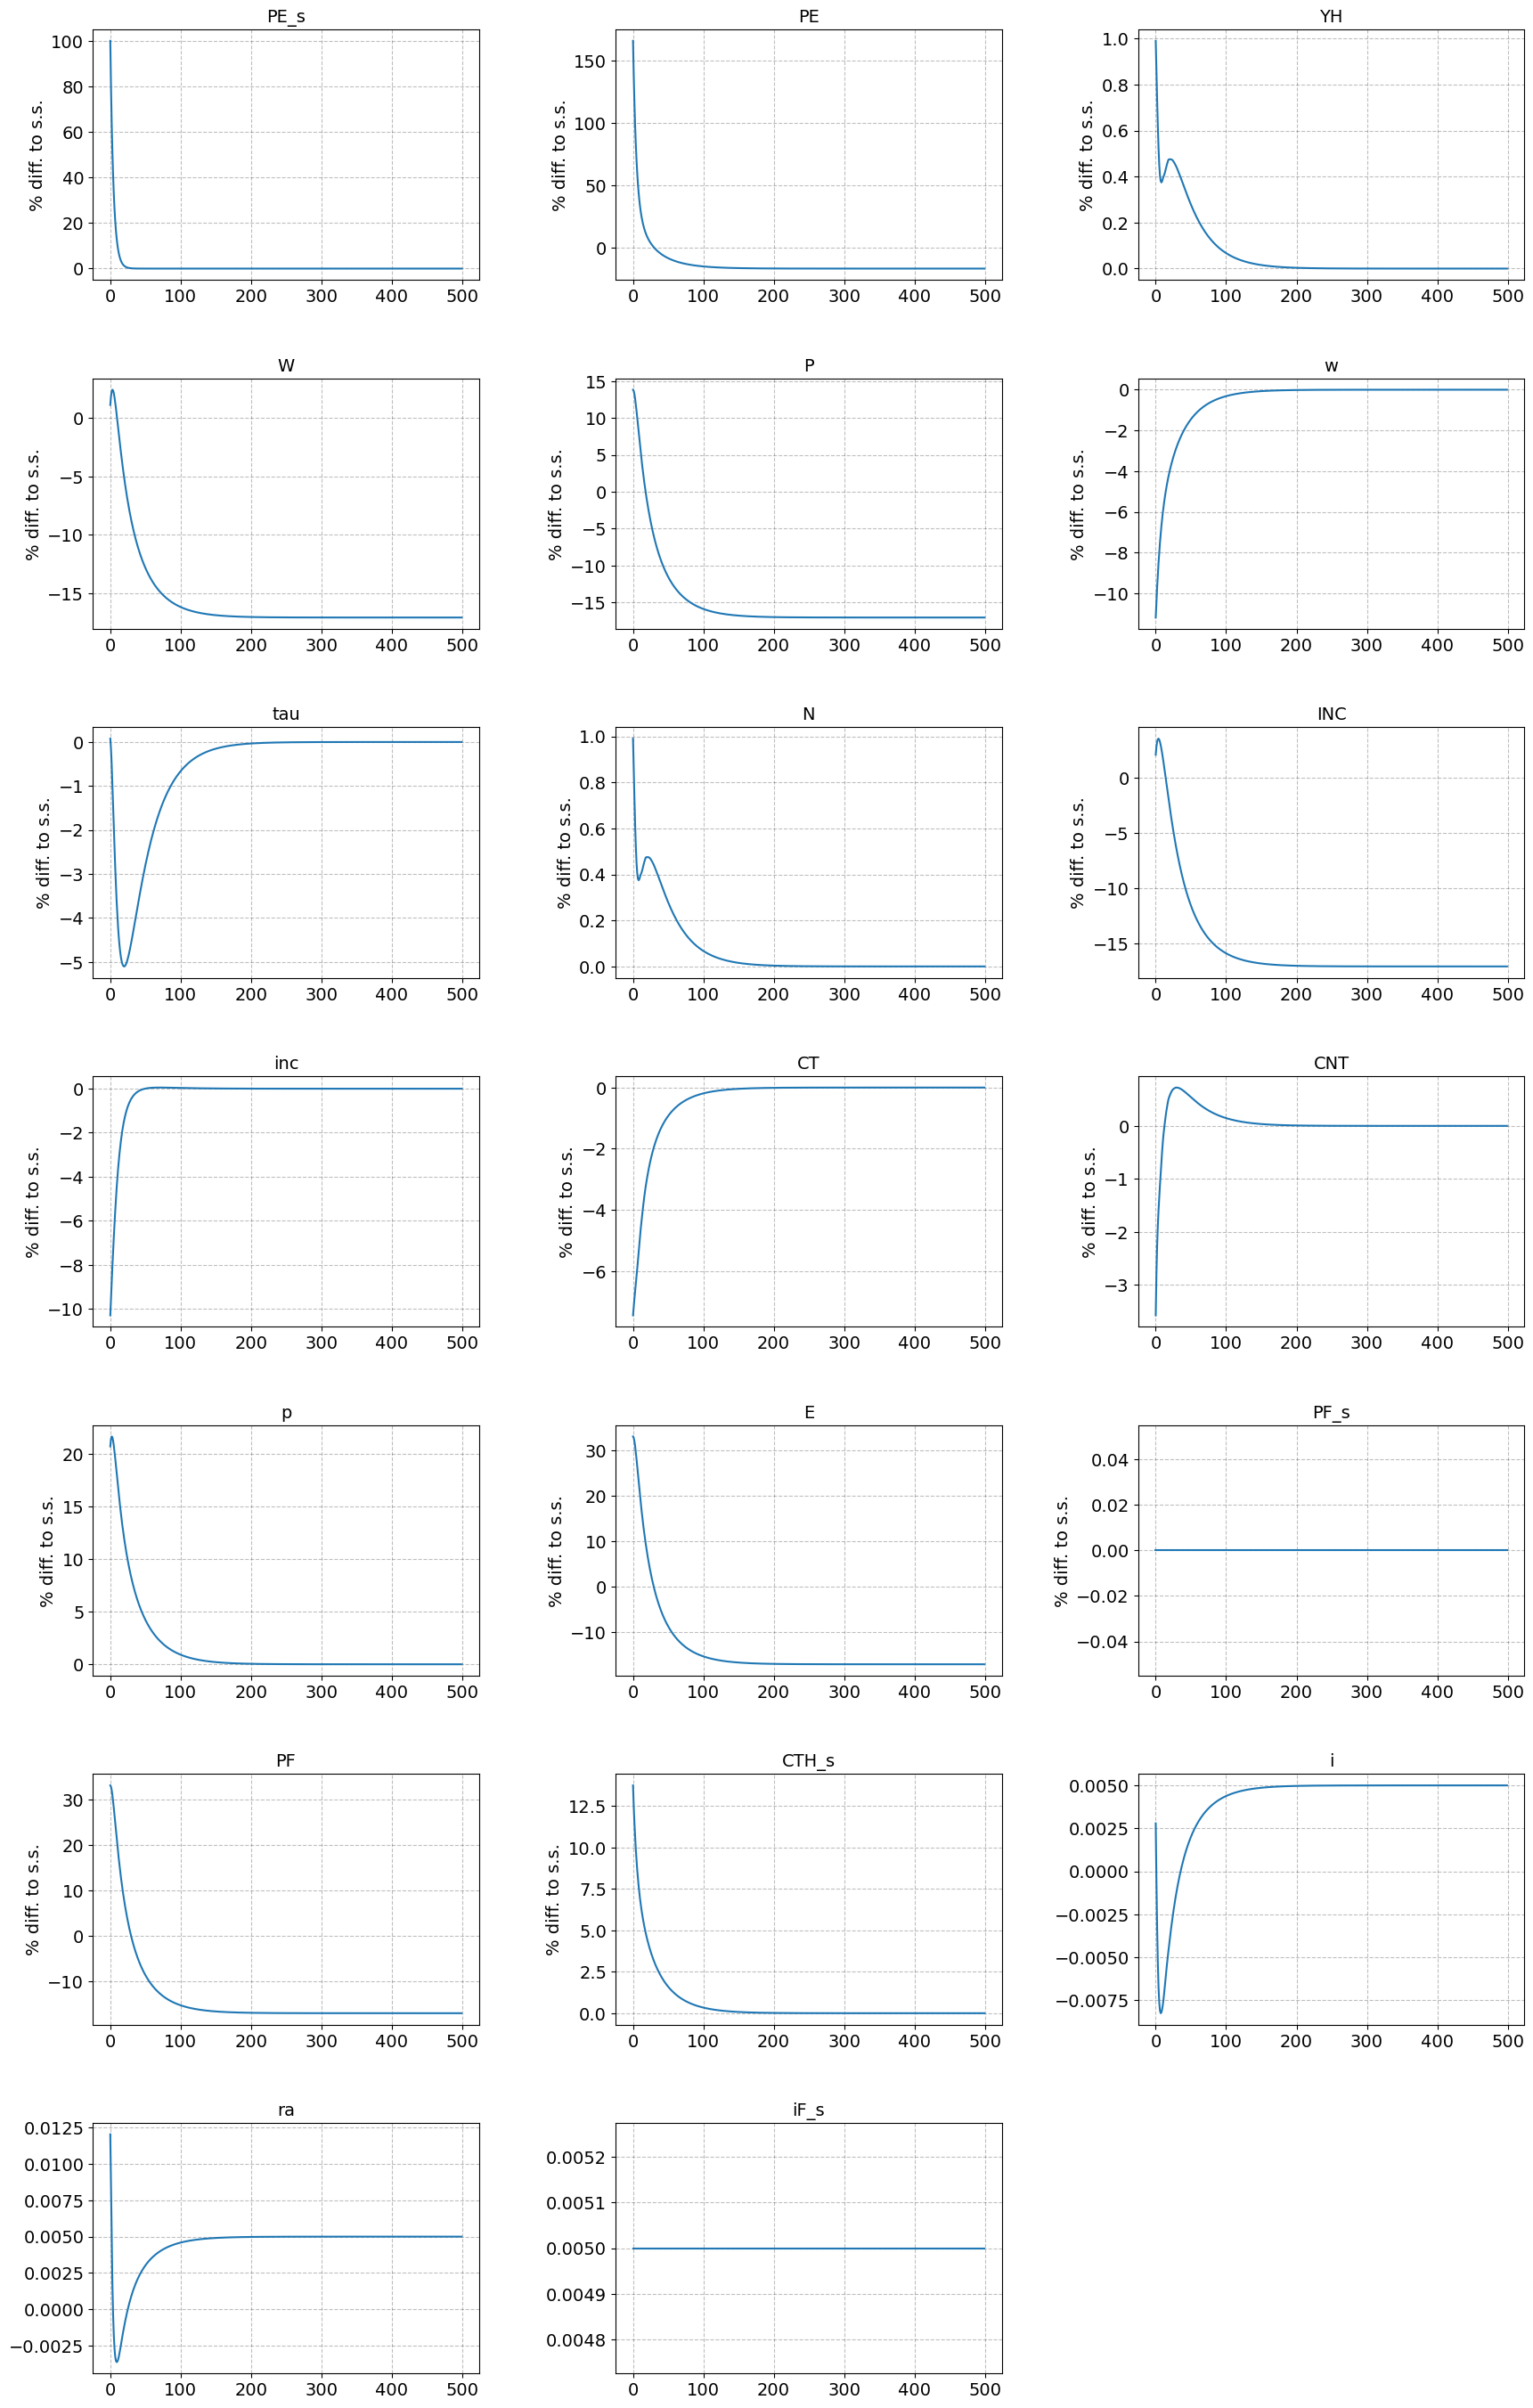

In [5]:
model_baseline = model.copy(name='Floating exchange rate')

model_baseline.find_transition_path(shocks=shock_PE_s, do_end_check=False)

model_baseline.show_IRFs(target_var, T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)
model_baseline.show_IRFs(paths, T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
Q = model_baseline.path.Q

plt.plot(Q)

In [ ]:
target_var = ['PE_s', 'Q', 'p', 'inc_NT', 'inc_TH', 'w', 'ra', 'i', 'Q', 'B', 'tau', 'YTH', 'YNT']
model_baseline.show_IRFs(target_var, T_max=500, ncols=1, lvl_value=lvl_path, do_shocks=False, do_targets=False)


In [1]:
plt.plot(model_baseline.path.B/model_baseline.path.PNT-model_baseline.ss.B/model_baseline.path.PNT)

NameError: name 'plt' is not defined

In [ ]:
model_baseline.show_IRFs(paths, do_shocks=False, do_targets=False, T_max=500, ncols=3, lvl_value=lvl_path)

In [ ]:
YTH = model_baseline.path.YTH
YNT = model_baseline.path.YNT
CNT = model_baseline.path.CNT
CTH = model_baseline.path.CTH 
CTH_s = model_baseline.path.CTH_s

# Differnce form ss 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(YTH - model_baseline.ss.YTH, label='YTH')
ax.plot(YNT - model_baseline.ss.YNT, label='YNT')
ax.plot(CNT - model_baseline.ss.CNT, label='CNT')
ax.plot(CTH - model_baseline.ss.CTH, label='CTH')
ax.plot(CTH_s - model_baseline.ss.CTH_s, label='CTH_s')
ax.legend()

In [ ]:
model_baseline.show_IRFs(model.varlist, do_shocks=False, do_targets=False, T_max=50, ncols=3, lvl_value=lvl_path)

In [ ]:
# fig = figs.plot_PE_s(model_baseline)
if save_figs:
    fig.savefig(path + 'PE_s.png', dpi=300)


In [ ]:
# fig = figs.plot_jac_p(model_baseline)
if save_figs:
    fig.savefig(path + 'jac_p.png', dpi=300)

In [ ]:

# Expenditure shares 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)

model = model_baseline


C_list = ['CT', 'CNT']
P_list = ['PT', 'PNT']
# prices = ['P', 'PT', 'PNT', 'PTHF', 'PTH', 'PF'  ]

for i in range(len(C_list)):
    P_ = P_list[i]
    P__ = model.path.__dict__[P_]
    dC = (model_baseline.path.__dict__[C_list[i]]*P__/model_baseline.ss.__dict__[C_list[i]] - 1)*100
    ax.plot(dC[:50],  label = C_list[i])


# for C in C_list:
#     dC = (model_baseline.path.__dict__[C]/model_baseline.ss.__dict__[C] - 1)*100
#     ax.plot(dC[:50],  label = C)


ax.set_title('Tradable and non-tradable')
ax.legend()

ax = fig.add_subplot(122)

C_list = ['CTHF', 'CE']
P_list = ['PTHF', 'PE']

for i in range(len(C_list)):
    P_ = P_list[i]
    P__ = model.path.__dict__[P_]
    # print(C_list[i])
    dC = (model_baseline.path.__dict__[C_list[i]]*P__/model_baseline.ss.__dict__[C_list[i]] - 1)*100
    ax.plot(dC[:50],  label = C_list[i])

ax.set_title('Energy and non-energy')
ax.legend()

In [ ]:


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

P = 'P'

prices = ['P', 'PT', 'PNT', 'PTHF', 'PTH', 'PF' , 'PE' ]

for P in prices:
    P_ = model_baseline.path.__dict__[P]
    ax.plot(P_[:50],  label = P)
ax.set_title('Price levels')
ax.legend()
plt.show()


In [ ]:
def share_T(par,e, PT=1, PNT=1):
    CT = (e/PT)*(par.nu_*(PNT/e)**par.epsilon_*(PT/PNT)**par.gamma_)
    CNT = (e/PNT)*(1-par.nu_*(PNT/e)**par.epsilon_*(PT/PNT)**par.gamma_)  
    return CT/(CT+CNT) 

In [ ]:
# Marginal propensity to consume/spend
# e = model_baseline.ss.e
par = model_baseline.par


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

i_fix = 0
Nz = 0

for i_z in [1]: #[par.Nz//2-1,par.Nz//2,par.Nz//2+1]:
    
    
    e = model_baseline.ss.e[i_fix,i_z, :]


    t_share = share_T(par,e[1:], PT=model_baseline.ss.PT, PNT=model_baseline.ss.PNT)

    e = model_baseline.ss.e[i_fix,i_z, :]
    MPC = (e[1:]-e[:-1])/((1+model.ss.ra)*(par.a_grid[1:]-par.a_grid[:-1]))
    ax.plot(t_share, MPC, label=f'Marginal propensity to spend')


    e = model_baseline.ss.ct[i_fix,i_z, :]
    MPC = (e[1:]-e[:-1])/((1+model.ss.ra)*(par.a_grid[1:]-par.a_grid[:-1]))
    ax.plot(t_share, MPC, label=f'Marginal propensity T')


    e = model_baseline.ss.cnt[i_fix,i_z, :]
    MPC = (e[1:]-e[:-1])/((1+model.ss.ra)*(par.a_grid[1:]-par.a_grid[:-1]))
    ax.plot(t_share, MPC, label=f'Marginal propensity NT')




#     ax.plot(par.a_grid[:-1],MPC,label=f'z = {par.z_grid[i_z]:.2f}')


ax.set_xlabel('$Tradable share$')

ax.legend(frameon=True);

fig.suptitle('MPC from policy function')
fig.tight_layout(pad=0.5)

# fig.savefig('figs/MPC_policy.pdf')

In [ ]:
# Marginal propensity to consume/spend
e = model_baseline.ss.e
par = model_baseline.par

# MPC = (e[i_fix,Nz, 1:]-e[i_fix, Nz,:-1])/((1+model.ss.ra)*(par.a_grid[1:]-par.a_grid[:-1]))


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# ax.plot(e[1:], MPC, label='MPC')
# ax.plot(e[1:], t_share, label='Tradable share')

i_fix = 0
Nz = 0

# a_grid initial assets in


for i_z in [1]: #[par.Nz//2-1,par.Nz//2,par.Nz//2+1]:
    e = model_baseline.ss.e[i_fix,i_z, :]
    MPC = (e[1:]-e[:-1])/((1+model.ss.ra)*(par.a_grid[1:]-par.a_grid[:-1]))
    t_share = share_T(par,e[1:], PT=model_baseline.ss.PT, PNT=model_baseline.ss.PNT)
    ax.plot(t_share, MPC, label=f'z = {par.z_grid[i_z]:.2f}')

    


#     ax.plot(par.a_grid[:-1],MPC,label=f'z = {par.z_grid[i_z]:.2f}')


ax.set_xlabel('$Tradable share$')

ax.legend(frameon=True);

fig.suptitle('MPC from policy function')
fig.tight_layout(pad=0.5)

# fig.savefig('figs/MPC_policy.pdf')

In [ ]:
model_high_epsilon = model.copy(name='High epsilon')
model_high_epsilon.par.epsilon_ = model.par.epsilon_ + 0.1
model_high_epsilon.find_ss(do_print=False)
model_high_epsilon.compute_jacs()

In [ ]:
model_high_gamma = model.copy(name='Gamma 0')
model_high_gamma.par.gamma_ = 0.0
model_high_gamma.find_ss(do_print=False)
model_high_gamma.compute_jacs()


In [ ]:
fig = figs.plot_jac_p(model_baseline)


In [ ]:
fig = figs.plot_jac_p(model_high_epsilon)

In [ ]:
fig = figs.plot_jac_p(model_high_gamma)

In [ ]:
# Expenditure on tradable and non-tradable goods as a function of total expenditure
# run_test = False


if run_test:
    a_ = model.ss.a[0,3,:]*model.ss.PNT
    e_ = model.ss.e[0,3,:]*model.ss.PNT
    ect_ = model.ss.ct[0,3,:]*model.ss.PT
    ecnt_ = model.ss.cnt[0,3,:]*model.ss.PNT
    share_ = ect_/(ecnt_+ect_)
    

    plt.figure()
    plt.plot(e_,share_)
    plt.xlabel('Total expenditure')
    plt.ylabel('Expenditure share tradable goods')
    plt.title('Non-homothetic expenditure shares')
    # model.test_hh_path()
    # model.test_path()
    # model.test_jacs()




In [ ]:
model_fixed = model.copy(name='Fixed exchange rate')
# model_fixed.par.nu = 2.0
model_fixed.par.float = False
model_fixed.find_ss(do_print=False)
model_fixed.compute_jacs()
model_fixed.find_transition_path(shocks=shock_PE_s, do_end_check=False)
# model_fixed.show_IRFs(paths, T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
model_taylor = model.copy(name='Taylor rule')
# model_taylor.par.nu = 2.0
model_taylor.par.float = True
model_taylor.par.mon_policy = 'taylor_OLD'
model_taylor.find_ss(do_print=False)
model_taylor.compute_jacs()
model_taylor.find_transition_path(shocks=shock_PE_s, do_end_check=False)
model_taylor.show_IRFs(paths, T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
models_list = [model_float, model_fixed, model_taylor]
labels = []
for i in models_list:
    labels.append(i.name)
print(labels)

In [ ]:
model_float.compare_IRFs(models=models_list, labels=labels, varnames=paths,  T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=True, do_targets=False)


In [ ]:
model_float.compare_IRFs(models_list, labels, ['PT', 'PNT', 'p'], T_max=100, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
model_float.compare_IRFs(models_list, labels, model.varlist, T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)